In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [55]:
aqi_data = pd.read_csv(r"DelhiAQI.csv")
aqi_data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
0,Delhi,01-01-2018,303.41,415.09,62.76,63.92,11.79,73.16,1.80,18.58,68.75,462
1,Delhi,01-02-2018,277.48,422.59,31.26,53.73,4.26,55.61,1.52,12.43,68.68,439
2,Delhi,01-03-2018,217.01,336.87,37.98,52.24,2.87,50.81,1.29,10.28,54.94,405
3,Delhi,01-04-2018,248.54,377.61,35.56,61.57,4.24,55.17,1.36,14.42,66.31,394
4,Delhi,01-05-2018,240.42,360.99,38.73,54.80,4.57,51.36,1.38,13.20,48.57,398


In [56]:
aqi_data = aqi_data.drop(['City','Date'], axis=1)
aqi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   913 non-null    float64
 1   PM10    913 non-null    float64
 2   NO      913 non-null    float64
 3   NO2     913 non-null    float64
 4   NOx     913 non-null    float64
 5   NH3     913 non-null    float64
 6   CO      913 non-null    float64
 7   SO2     913 non-null    float64
 8   O3      913 non-null    float64
 9   AQI     913 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 71.5 KB


In [57]:
aqi_data.isna().sum()

PM2.5    0
PM10     0
NO       0
NO2      0
NOx      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [58]:
aqi_data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
count,913.000000,913.000000,913.00000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000
mean,105.458171,213.439157,31.97747,43.098346,51.963604,38.338368,1.322881,13.852180,41.454918,228.813801
std,77.477643,116.910831,26.56564,15.931366,30.946864,9.813347,0.562686,4.226043,12.438408,113.960050
min,10.240000,19.510000,4.42000,14.360000,1.870000,19.900000,0.520000,6.180000,16.510000,51.000000
25%,49.960000,120.820000,13.19000,30.730000,29.360000,30.860000,0.930000,10.440000,31.560000,129.000000
50%,81.870000,193.790000,22.50000,41.230000,43.920000,36.610000,1.160000,13.250000,40.160000,208.000000
75%,137.290000,281.530000,40.92000,54.010000,66.400000,44.470000,1.520000,16.550000,50.560000,306.000000
max,582.280000,761.910000,158.63000,106.040000,195.810000,75.880000,3.660000,33.500000,76.320000,659.000000


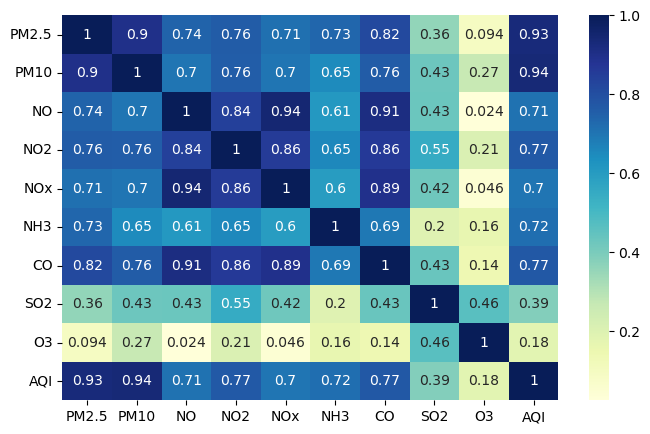

In [59]:
fig, axs = plt.subplots(figsize = (8, 5))
dataplot=sns.heatmap(aqi_data.corr(),annot=True, cmap='YlGnBu')
plt.show()

### Outlier detection

In [60]:
aqi_data[['PM2.5','PM10','NO', 'NO2']].quantile(0.99)

PM2.5    370.2872
PM10     539.7980
NO       121.5520
NO2       82.6108
Name: 0.99, dtype: float64

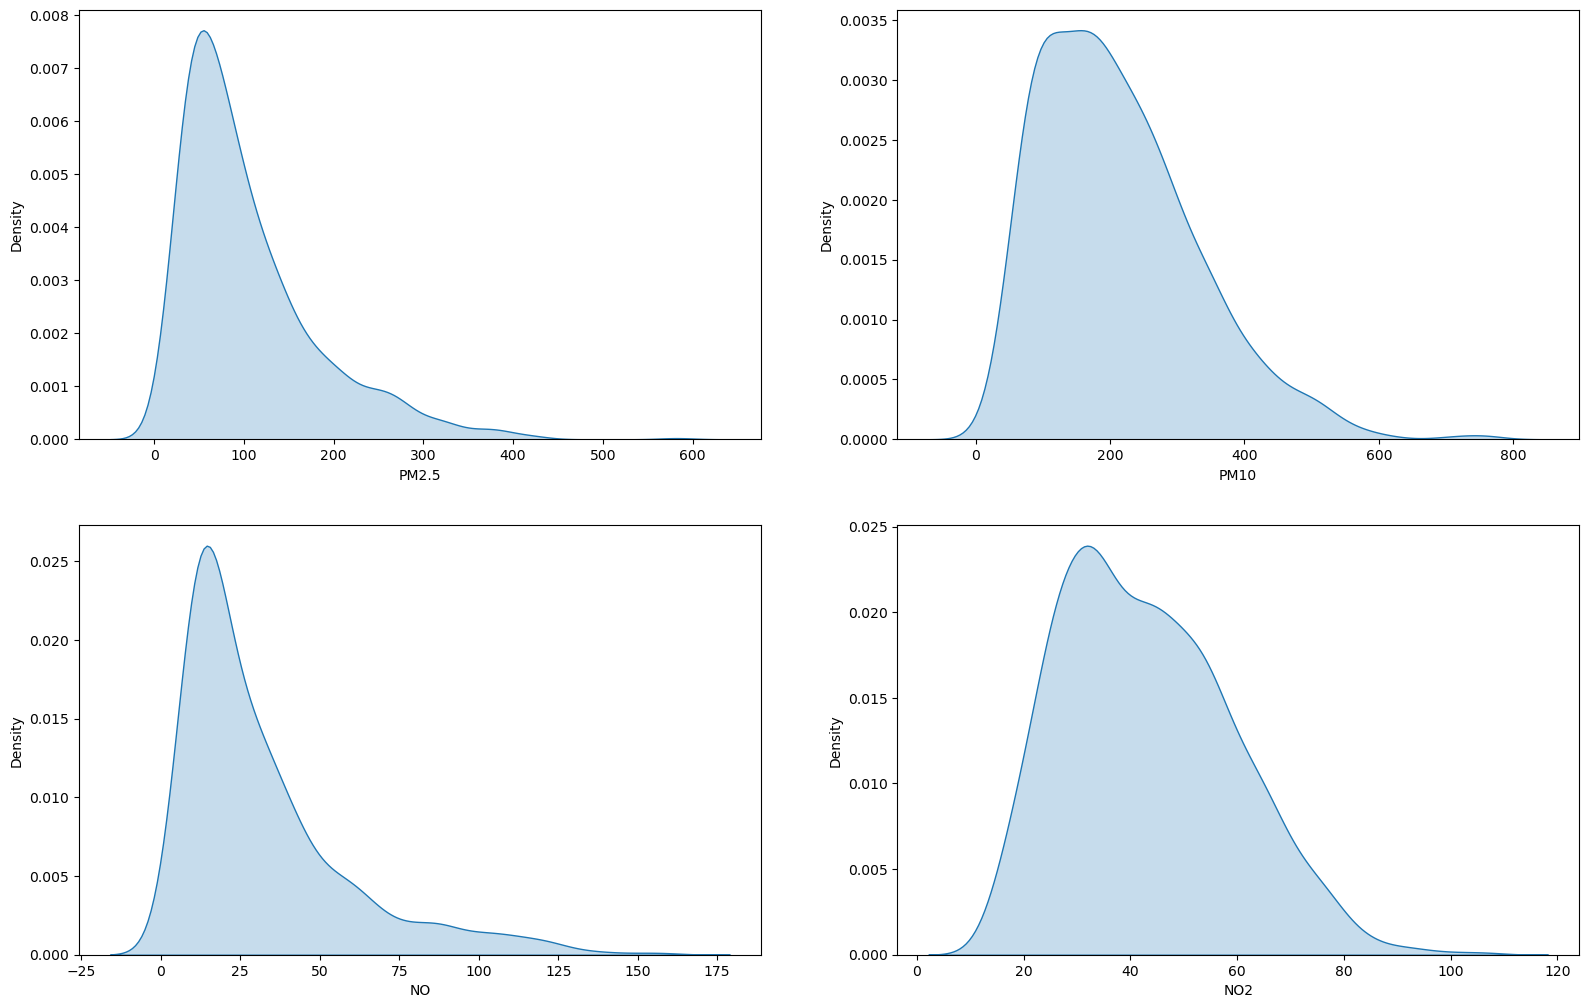

In [61]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (8, 5))

sns.kdeplot(data = aqi_data, x = 'PM2.5', shade = True, ax = axs[0][0])
sns.kdeplot(data = aqi_data, x = 'PM10', shade = True, ax = axs[0][1])
sns.kdeplot(data = aqi_data, x = 'NO', shade = True, ax = axs[1][0])
sns.kdeplot(data = aqi_data, x = 'NO2', shade = True, ax = axs[1][1])

plt.subplots_adjust(top = 2, right = 2)
plt.show()

In [62]:
zscore1= np.abs(stats.zscore(aqi_data['PM2.5']))
print(np.where(zscore1>3)[0])
print(len(np.where(zscore1>3)[0]))

zscore2= np.abs(stats.zscore(aqi_data['PM10']))
print(np.where(zscore2>3)[0])
print(len(np.where(zscore2>3)[0]))

zscore3= np.abs(stats.zscore(aqi_data['NO']))
print(np.where(zscore3>3)[0])
print(len(np.where(zscore3>3)[0]))

zscore4= np.abs(stats.zscore(aqi_data['NO2']))
print(np.where(zscore4>3)[0])
print(len(np.where(zscore3>3)[0]))

[308 311 356 357 367 381 669 671 680 681 682 683 730]
13
[163 164 165 669 671 683]
6
[298 299 330 331 335 336 337 338 339 353 356 357 363 375 376 384 400 703
 731]
19
[ 40  51 384 689 703]
19


In [63]:
df = aqi_data
for i in np.where((zscore1>3) | (zscore2>3) | (zscore3>3) | (zscore4>3)):
    df.drop(i, axis = 0, inplace = True)

In [64]:
print("New dimensions:", df.shape)
df.describe()

New dimensions: (877, 10)


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
count,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000
mean,97.768552,202.518563,29.394527,41.975268,49.113284,37.810034,1.267891,13.741334,41.451368,219.346636
std,66.085714,103.486409,22.297325,14.791660,26.740733,9.464780,0.483185,4.195496,12.611850,104.676086
min,10.240000,19.510000,4.420000,14.360000,1.870000,19.900000,0.520000,6.180000,16.510000,51.000000
25%,48.460000,117.660000,12.820000,30.460000,29.100000,30.720000,0.920000,10.420000,31.250000,127.000000
50%,78.400000,187.590000,21.370000,40.610000,42.630000,36.340000,1.140000,13.000000,40.180000,202.000000
75%,128.450000,270.870000,38.730000,52.700000,63.160000,43.540000,1.470000,16.390000,50.710000,294.000000
max,333.430000,516.850000,111.090000,85.560000,143.910000,75.880000,3.200000,33.500000,76.320000,532.000000


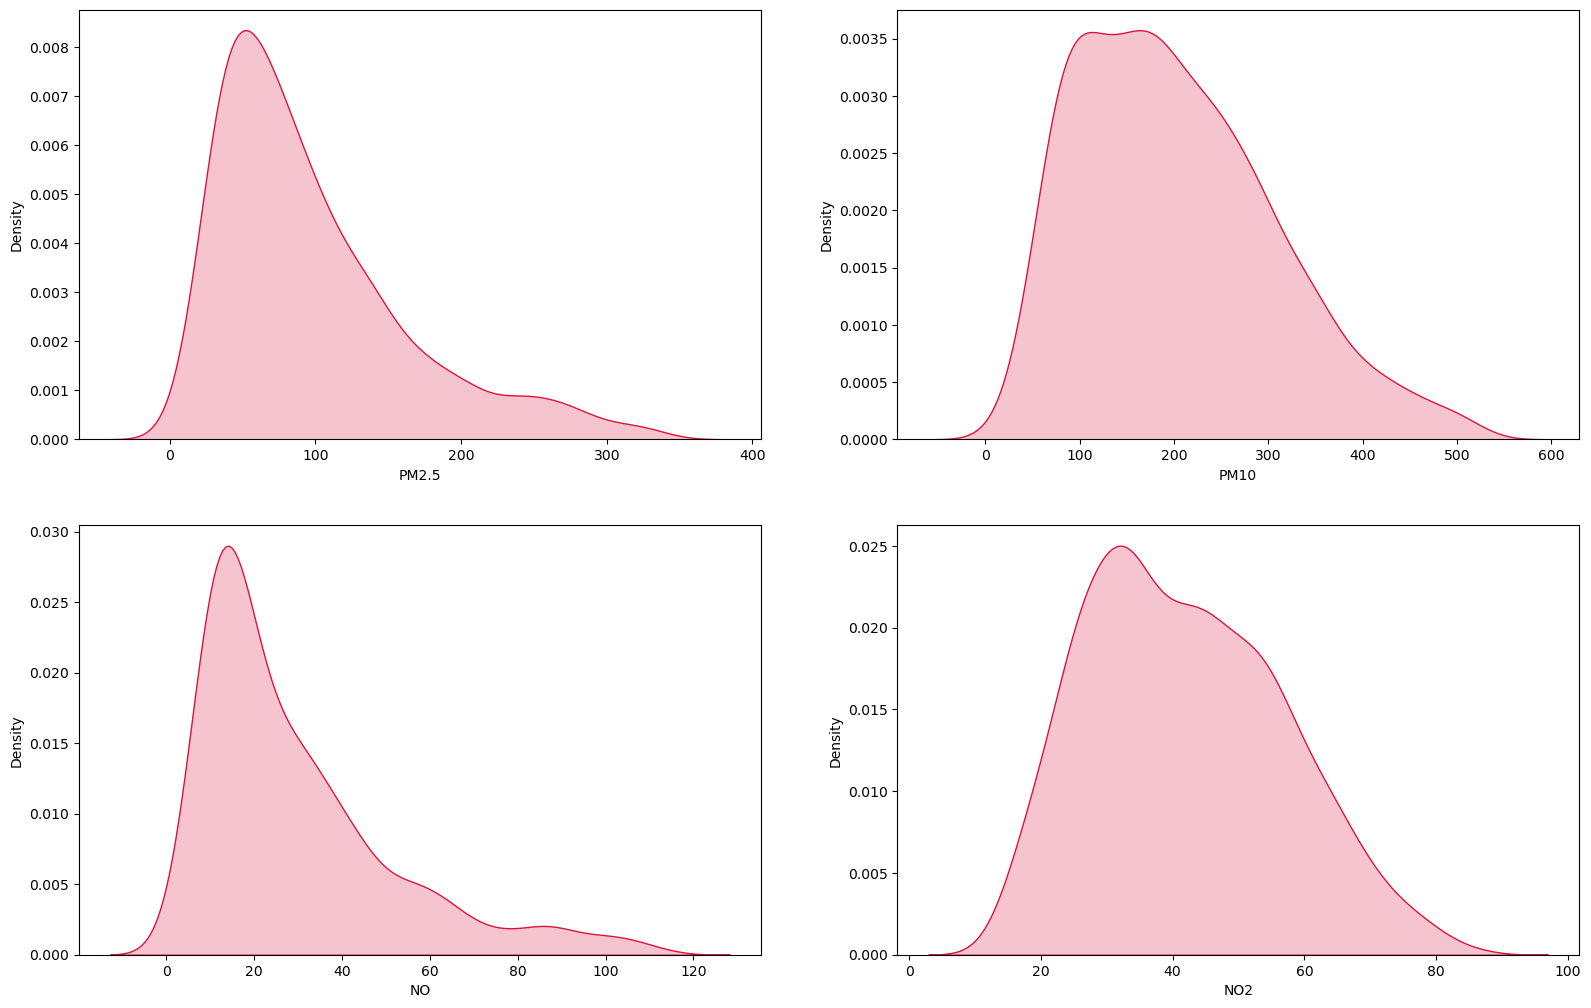

In [65]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (8, 5))

sns.kdeplot(data = df, x = 'PM2.5', shade = True, color="crimson", ax = axs[0][0])
sns.kdeplot(data = df, x = 'PM10', shade = True, color="crimson", ax = axs[0][1])
sns.kdeplot(data = df, x = 'NO', shade = True, color="crimson", ax = axs[1][0])
sns.kdeplot(data = df, x = 'NO2', shade = True, color="crimson", ax = axs[1][1])

plt.subplots_adjust(top = 2, right = 2)
plt.show()

## Model Selection

In [66]:
from sklearn.model_selection import train_test_split

X = df.drop(['AQI'], axis=1)
Y = df[['AQI']]

x_train, x_test, y_train, y_test= train_test_split(X, Y, train_size=0.75, random_state=42)

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.model_selection import cross_val_score

scaler=StandardScaler()

X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
y_train_scaled=scaler.fit_transform(y_train)

#x_test_scaled
#print(scaler.fit_transform(x_train))

<h3>Linear regression</h3>

In [68]:
from sklearn.linear_model import LinearRegression

model1=LinearRegression()
model1.fit(x_train_scaled,y_train_scaled)
y_pred1=model1.predict(x_test_scaled)
y_pred1_inv=scaler.inverse_transform(y_pred1)

accuracy1=cross_val_score(model1, X_scaled, Y_scaled, cv=4, scoring='neg_root_mean_squared_error')
print("Absolute value of negative RMSE using cross validation:", abs(accuracy1.mean()))
accuracy1=cross_val_score(model1, X_scaled, Y_scaled, cv=4, scoring='r2')
print("R2 score using cross validation:", accuracy1.mean())
print("")
mae1 = mean_absolute_error(y_test, y_pred1_inv) 
mse1 = mean_squared_error(y_test, y_pred1_inv) 
rmse1 = np.sqrt(mse1) 
r2_1 = r2_score(y_test, y_pred1_inv) 
print("MAE:", mae1, " RMSE:", rmse1," R2 Score:", r2_1)

Absolute value of negative RMSE using cross validation: 0.32263582509179045
R2 score using cross validation: 0.8779617674087626

MAE: 22.740863967333073  RMSE: 31.947221549682894  R2 Score: 0.9006762700108424


<h3>Ridge Regression</h3>

In [69]:
from sklearn.linear_model import Ridge

model2=Ridge()
model2.fit(x_train_scaled,y_train_scaled)
y_pred2=model2.predict(x_test_scaled)
y_pred2_inv=scaler.inverse_transform(y_pred2)

accuracy2=cross_val_score(model2, X_scaled, Y_scaled, cv=4, scoring='neg_root_mean_squared_error')
print("Absolute value of negative RMSE using cross validation:", abs(accuracy2.mean()))
accuracy2=cross_val_score(model2, X_scaled, Y_scaled, cv=4, scoring='r2')
print("R2 score using cross validation:", accuracy2.mean())
print("")
mae2 = mean_absolute_error(y_test, y_pred2_inv) 
mse2 = mean_squared_error(y_test, y_pred2_inv) 
rmse2 = np.sqrt(mse2) 
r2_2 = r2_score(y_test, y_pred2_inv) 
print("MAE:", mae2, " RMSE:", rmse2," R2 Score:", r2_2)

Absolute value of negative RMSE using cross validation: 0.3146311247552481
R2 score using cross validation: 0.8863875478687613

MAE: 22.7270119870396  RMSE: 31.936616149210682  R2 Score: 0.9007422033246344


<h3>Lasso Regression</h3>

In [70]:
from sklearn.linear_model import Lasso

model3=Lasso(alpha=0.0)
model3.fit(x_train_scaled,y_train_scaled)
y_pred3=model3.predict(x_test_scaled)
y_pred3_inv=scaler.inverse_transform(y_pred3.reshape(-1, 1))

accuracy3=cross_val_score(model3, X_scaled, Y_scaled, cv=4, scoring='neg_root_mean_squared_error')
print("Absolute value of negative RMSE using cross validation:", abs(accuracy3.mean()))
accuracy3=cross_val_score(model3, X_scaled, Y_scaled, cv=4, scoring='r2')
print("R2 score using cross validation:", accuracy3.mean())
print("")
mae3 = mean_absolute_error(y_test, y_pred3_inv) 
mse3 = mean_squared_error(y_test, y_pred3_inv) 
rmse3 = np.sqrt(mse3) 
r2_3 = r2_score(y_test, y_pred3_inv) 
print("MAE:", mae3, " RMSE:", rmse3," R2 Score:", r2_3)

Absolute value of negative RMSE using cross validation: 0.3225518405149963
R2 score using cross validation: 0.8780537508478039

MAE: 22.740863967333063  RMSE: 31.947221549682897  R2 Score: 0.9006762700108424


<h3>Random Forest I</h3>
<p>using scaled training and testing dataset</p>

In [85]:
from sklearn.ensemble import RandomForestRegressor 
 
model4a=RandomForestRegressor()
model4a.fit(x_train_scaled,y_train_scaled)
y_pred4a=model4a.predict(x_test_scaled)
y_pred4a_inv=scaler.inverse_transform(y_pred4a.reshape(-1, 1))

print(model4a.score(x_train_scaled,y_train_scaled))
accuracy4a=cross_val_score(model4, X_scaled, Y_scaled, cv=4, scoring='r2')
print("R2 score using cross validation:", accuracy4a.mean())
print("")

mae4a = mean_absolute_error(y_test, y_pred4a_inv) 
mse4a = mean_squared_error(y_test, y_pred4a_inv) 
rmse4a = np.sqrt(mse4a) 
r2_4a = r2_score(y_test, y_pred4a_inv) 
print("MAE:", mae4a, " RMSE:", rmse4a," R2 Score:", r2_4a)

0.9911047498440603
R2 score using cross validation: 0.9186005399852271

MAE: 19.171409090909094  RMSE: 27.805713629657944  R2 Score: 0.9247589366075863


In [86]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [200, 400, 600, 800]
max_features = [None]
max_depth = [3,6]
min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)
print("")

{'n_estimators': [200, 400, 600, 800], 'max_features': [None], 'max_depth': [3, 6], 'min_samples_leaf': [1, 2, 4]}



In [ ]:
rf_random_a = RandomizedSearchCV(estimator = model4a, param_distributions = random_grid, n_iter = 100, cv = 4, verbose=2, random_state=42, n_jobs = -1)
rf_random_a.fit(x_train_scaled, y_train_scaled)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


In [79]:
print("Best parameters:",rf_random_a.best_params_)
rf_random_a.best_score_
best_random_a = rf_random_a.best_estimator_
#n_estimators=800, min_samples_leaf=2, max_features=None, max_depth=6 

Best parameters: {'n_estimators': 400, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 6}


In [80]:
def evaluate_a(model, x_train_scaled, y_train_scaled):
    predictions = model.predict(x_test_scaled)
    y_pred_inv=scaler.inverse_transform(predictions.reshape(-1, 1))
    accuracy_a = r2_score(y_test, y_pred_inv)
    print('Model Performance')
    print('Accuracy = {:0.4f}%.'.format(accuracy_a))
    print("")
    return accuracy_a

base_accuracy_a = evaluate_a(model4a, x_train_scaled, y_train_scaled)
random_accuracy_a = evaluate_a(best_random, x_train_scaled, y_train_scaled)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy_a - base_accuracy_a) / base_accuracy_a))

Model Performance
Accuracy = 0.9267%.

Model Performance
Accuracy = 0.9250%.

Improvement of -0.18%.


<h3>Random Forest II</h3>
<p>using unscaled training and testing dataset</p>

In [81]:
from sklearn.ensemble import RandomForestRegressor 
 
model4b=RandomForestRegressor()
model4b.fit(x_train, y_train)
y_pred4b=model4b.predict(x_test)

print(model4b.score(x_train, y_train))
accuracy4b=cross_val_score(model4b, X, Y, cv=4, scoring='r2')
print("R2 score using cross validation:", accuracy4b.mean())
print("")

mae4b = mean_absolute_error(y_test, y_pred4b) 
mse4b = mean_squared_error(y_test, y_pred4b) 
rmse4b = np.sqrt(mse4b) 
r2_4b = r2_score(y_test, y_pred4b) 
print("MAE:", mae4b, " RMSE:", rmse4b," R2 Score:", r2_4b)

0.9910556089069916
R2 score using cross validation: 0.9159241202925292

MAE: 19.26659090909091  RMSE: 27.913756945602678  R2 Score: 0.9241730794780237


In [82]:
rf_random_b = RandomizedSearchCV(estimator = model4b, param_distributions = random_grid, n_iter = 100, cv = 4, verbose=2, random_state=42, n_jobs = -1)
rf_random_b.fit(x_train, y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 6],
                                        'max_features': [None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'n_estimators': [200, 400, 600, 800]},
                   random_state=42, verbose=2)

In [83]:
print("Best parameters:",rf_random_b.best_params_)
rf_random_b.best_score_
best_random_b = rf_random_b.best_estimator_

Best parameters: {'n_estimators': 800, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 6}


In [84]:
def evaluate_b(model, x_train, y_train):
    predictions = model.predict(x_test)
    accuracy_b = r2_score(y_test, predictions)
    print('Model Performance')
    print('Accuracy = {:0.4f}%.'.format(accuracy_b))
    print("")
    return accuracy_b

base_accuracy_b = evaluate_b(model4b, x_train, y_train)
random_accuracy_b = evaluate_b(best_random_b, x_train, y_train)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy_b - base_accuracy_b) / base_accuracy_b))

Model Performance
Accuracy = 0.9242%.

Model Performance
Accuracy = 0.9245%.

Improvement of 0.04%.


<h3> Bayesian Linear Regression </h3>

In [ ]:
from sklearn.linear_model import BayesianRidge

model5=BayesianRidge()
model5.fit(x_train_scaled,y_train)
y_pred5=model5.predict(x_test_scaled)

print(model5.score(x_train_scaled,y_train)*100)
print("")
accuracy5=cross_val_score(model5, X, Y)
print("Accuracy result is:", accuracy5.mean()*100)
print("")

### Testing

In [87]:
l1= x_train_scaled[3,:] #taking any random row from dataset to check linear regression
l2= model1.coef_.flatten().tolist()
print(l2)
print(sum(l2))

y1=0 # y = m1*x1 + m2*x2 + m3*x3...+c
for (i,j) in zip(l1, l2):
    y1 += (i*j)
    
print(y1+model1.intercept_)    
pr = model1.predict(l1.reshape(1,-1))
print(scaler.inverse_transform(pr)) 

[0.4901673757525514, 0.5079542099813259, -0.09702884694147967, 0.04228131251228323, 0.07106827400675711, 0.04544937696160958, -0.0604662578636809, 0.004130571724878296, -0.02120610149556118]
0.982349914638684
[0.45767759]
[[266.11358774]]


In [88]:
mode=LinearRegression()
mode.fit(x_train, y_train) #un-scaled values

l1= np.array(df.iloc[3, :9])
l2= mode.coef_.flatten().tolist()
print(l2)
print(sum(l2))

y2=0
for (i,j) in zip(l1, l2):
    y2=y2+(i* j)

print(y2+mode.intercept_)    
print(mode.predict(l1.reshape(1,-1)))    

[0.7792560265261455, 0.5145973832447501, -0.4793080050590515, 0.30641815617187823, 0.2909118456899074, 0.5007315546613954, -13.522647136872036, 0.10353630074655298, -0.17388333183333363]
-11.680387206723791
[419.43163988]
[[419.43163988]]
